# Import Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Read Data

In [66]:
df_2d = pd.read_csv('Data\\data_2d.csv', header=None)
df_mnist = pd.read_csv('Data\\mnist.csv', header=None)

In [67]:
df_2d.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


In [68]:
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2d data

In [69]:
X_2d = df_2d.drop(0, axis=1)
Y_2d = df_2d[0]

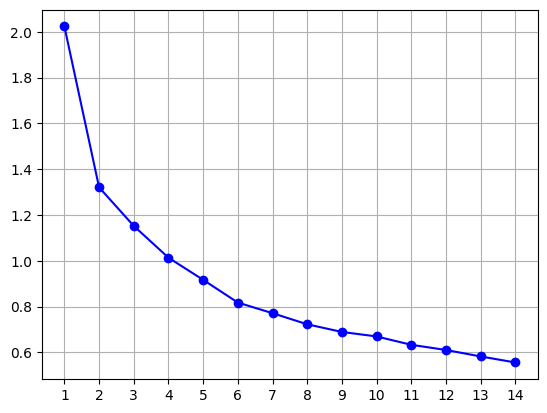

In [70]:
inertials = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X=X_2d)
    inertials.append(np.sqrt(km.inertia_/len(X_2d)))

plt.plot(K, inertials, 'bo-')
plt.xticks(K)
plt.grid()
plt.show()

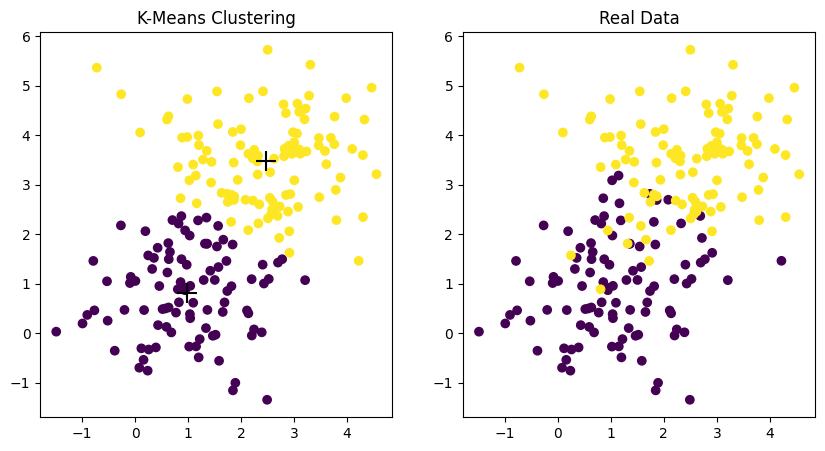

In [71]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_2d)
centers = kmeans.cluster_centers_
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x=X_2d[1], y=X_2d[2], c=kmeans.labels_)
ax1.scatter(x=centers[:,0], y=centers[:,1], marker='+', c='k', s=200)
ax1.set_title("K-Means Clustering")

ax2.scatter(x=X_2d[1], y=X_2d[2], c=Y_2d)
ax2.set_title("Real Data")

plt.show()

# mnist

In [72]:
X_mnist = df_mnist.drop(columns=0)
Y_mnist = df_mnist[0]


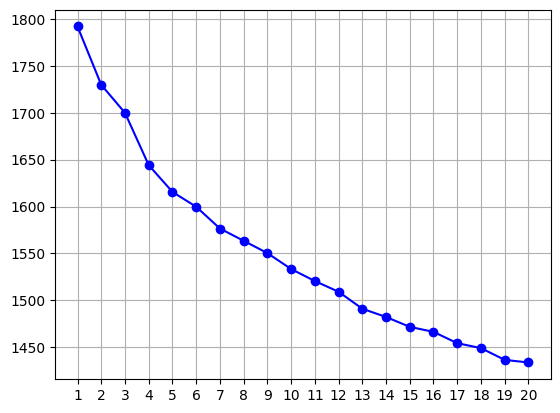

In [76]:
inertials = []
K = range(1, 21)

for k in K:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(X=X_mnist)
    inertials.append(np.sqrt(km.inertia_/len(X_mnist)))

plt.plot(K, inertials, 'bo-')
plt.xticks(K)
plt.grid()
plt.show()

In [78]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_mnist)

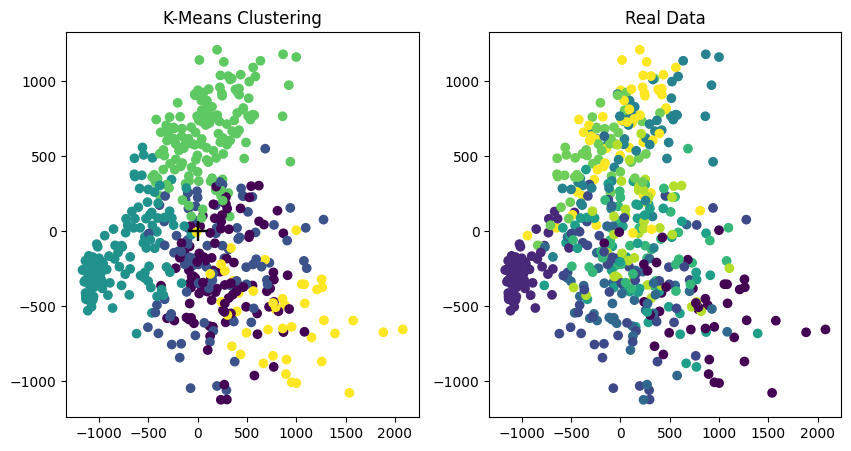

In [85]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_mnist)
centers = kmeans.cluster_centers_


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x=X_pca[:,0], y=X_pca[:,1], c=kmeans.labels_)
ax1.scatter(x=centers[:,0], y=centers[:,1], marker='+', c='k', s=200)
ax1.set_title("K-Means Clustering")

ax2.scatter(x=X_pca[:,0], y=X_pca[:,1], c=Y_mnist)
ax2.set_title("Real Data")

plt.show()